1. Data Profiling Stage:
- Split the textual data into words.
- Print the 10 most frequent words in all textual content.
- Visualize the textual content using two different charts.
- Print the total number of stopwords and the 10 most frequent stopwords in the text.
- Check and identify the spelling mistakes in the text.
2. Data Cleaning Stage:
- Remove all stopwords and punctuation.
- Print the 10 most frequent words in all textual content.
- Convert all words to small letters.
- Print the count of unique words in the text.
- Remove all typos with the correct word.
- Apply a lemmatization technique.
- Print the count of unique words in the text.

3. Update the GitHub repository. The README.md file should include more information about all steps and their output. You should describe the generated charts.


In [1]:
# read data form github
import pandas as pd 
url= 'https://raw.githubusercontent.com/hamzahzureigat/data-/main/data3.csv'
df=pd.read_csv(url)
#print(df)
text = df['content']
text

0       analysis of the heat pump fiasco. It is a perf...
1       X payah buat committee. Just use the RM50+ bil...
2       I'd build rockets to send humans to Mars, manu...
3       @GrandCanyon72 @MikeHudema There was a time…\n...
4       More regulatory terrorism for California busin...
                              ...                        
5703    🚨🚨🚨\n\nYou CANNOT stream, vote or do anything ...
5704    People buy @Tesla because they are the best ca...
5705    ⭐DONATE NEW SOBA ACCOUNTS or DONATE CASH for p...
5706    Do people want to buy EVs? Yup. "Model 3 wallo...
5707    Thought of the day: some people claim that EVs...
Name: content, Length: 5708, dtype: object

# 1. Data Profiling Stage:

### 1.1) Split the textual data into words 


In [2]:
single_word =list()
i=0
while i < len(text):
    add=text[i].split(' ')
    single_word+=add
    i=i+1
single_word

['analysis',
 'of',
 'the',
 'heat',
 'pump',
 'fiasco.',
 'It',
 'is',
 'a',
 'perfect',
 'example',
 'of',
 'this',
 'Government’s',
 'half-baked',
 'policy-making.\n\nWhere',
 'is',
 'all',
 'the',
 'electricity',
 'going',
 'to',
 'come',
 'from',
 '(not',
 'just',
 'to',
 'power',
 'the',
 'heat',
 'pumps,',
 'but',
 'also',
 'the',
 'electric',
 'cars',
 'we',
 'are',
 'going',
 'to',
 'be',
 'forced',
 'to',
 'buy)?',
 'https://t.co/m9pMRpiNTv',
 'X',
 'payah',
 'buat',
 'committee.',
 'Just',
 'use',
 'the',
 'RM50+',
 'bil',
 'budget',
 'for',
 'MRT3,',
 'and',
 'buy',
 'shitloads',
 'of',
 'electric',
 'buses',
 'to',
 'cover',
 'Klang',
 'Valley,',
 'Penang,',
 'Melaka,',
 'JB.',
 'Build',
 'BRT',
 'in',
 'certain',
 'corridors.',
 'Reduce',
 'fuel',
 'subsidy',
 'for',
 'cars',
 'priced',
 'more',
 'than',
 'RM100k,',
 'and',
 'abolish',
 'subsidy',
 'for',
 'cars',
 'priced',
 '&gt;RM200k.',
 "I'd",
 'build',
 'rockets',
 'to',
 'send',
 'humans',
 'to',
 'Mars,',
 'manufa

### 1.2) Print the 10 most frequent words in all textual content


In [3]:
com=[]
from collections import Counter
words_f = Counter(single_word)
for w, f  in words_f.most_common(10):
    print(f"{w}: {f}")
    com+=[(w,f)]

to: 7450
the: 5289
buy: 5159
electric: 4686
a: 3551
and: 2798
of: 2607
an: 2395
in: 2094
you: 2075


### 1.3) Visualize the textual content using two different charts.


#### first chart 

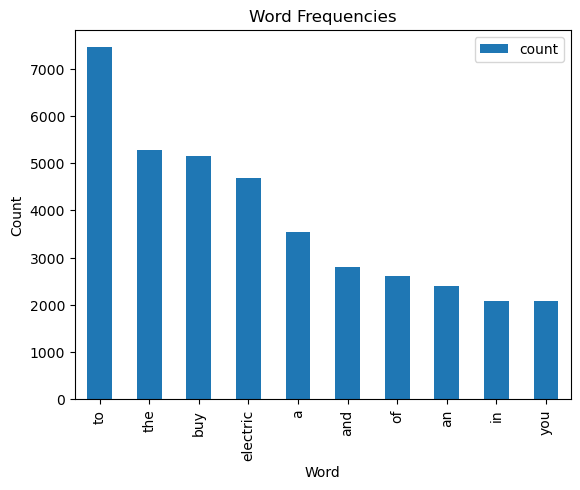

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
com1 = np.array(com)
com2 = {row[0]: row[1] for row in com1}
# create the dictionary
my_dict = com2
# dictionary data frame
df = pd.DataFrame.from_dict(com2, orient='index', columns=['count'])
# convert the count column to numeric values
df['count'] = pd.to_numeric(df['count'])
ax = df.plot.bar()
ax.set_title('Word Frequencies')
ax.set_xlabel('Word')
ax.set_ylabel('Count')
plt.show()


###  1.4) Print the total number of stopwords and the 10 most frequent stopwords in the text.


In [5]:
pip install nltk 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install stopwords


Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
",". join(stopwords.words ('english'))
stop_words=list(stopwords.words('english'))
stop_words
# total number of stopwords
stopword_count = sum([1 for word in single_word if word in stop_words])
print(f"Total number of stopwords: {stopword_count}")
swf = {}
for w in single_word:
    if w in stop_words:
        if w in swf:
            swf[w] += 1
        else:
            swf[w] = 1
print("10 most frequent stop words:")
for w, f in sorted(swf.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{w}: {f}")

[nltk_data] Downloading package stopwords to /Users/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total number of stopwords: 63624
10 most frequent stop words:
to: 7450
the: 5289
a: 3551
and: 2798
of: 2607
an: 2395
in: 2094
you: 2075
is: 2035
for: 1864


### 1.5) Check and identify the spelling mistakes in the text.


In [8]:
def identify_misspelled_words(dictionary_file):
    # load dictionary from githup  of valid words
    import requests
    response = requests.get(dictionary_file)
    dic = set(response.content.decode('utf-8').splitlines())
    misspelled_words = []
    for i in single_word:
        if i not in dic:
            misspelled_words.append(i)
    return misspelled_words
misspelled_words=identify_misspelled_words('https://raw.githubusercontent.com/first20hours/google-10000-english/master/20k.txt')
misspelled_words

['fiasco.',
 'It',
 'Government’s',
 'half-baked',
 'policy-making.\n\nWhere',
 '(not',
 'pumps,',
 'buy)?',
 'https://t.co/m9pMRpiNTv',
 'X',
 'payah',
 'buat',
 'committee.',
 'Just',
 'RM50+',
 'bil',
 'MRT3,',
 'shitloads',
 'Klang',
 'Valley,',
 'Penang,',
 'Melaka,',
 'JB.',
 'Build',
 'BRT',
 'corridors.',
 'Reduce',
 'RM100k,',
 'abolish',
 '&gt;RM200k.',
 "I'd",
 'Mars,',
 'scale,',
 'traffic,',
 'AI',
 'else?',
 'Yeah,',
 'Twitter',
 'shitpost',
 'it.',
 '@GrandCanyon72',
 '@MikeHudema',
 'There',
 'time…\n\nAnd',
 '“voluntary”',
 'measure,',
 'vehicles,',
 'charged,',
 'time.',
 'There',
 'isn’t',
 'power…',
 'https://t.co/886xYw5NaJ',
 'More',
 'California',
 'businesses.',
 'Much',
 'CARB',
 'ride-share',
 'cars,',
 'coercive',
 '"mitigation"',
 'infeasible.',
 'THUG',
 'MBS',
 'Saudia',
 'Arabia',
 'oil.',
 '',
 'Is',
 'stupid?',
 '',
 'We’re',
 'cars;',
 'countries;',
 'oil.',
 '',
 'What',
 'jackass.',
 '@LocalBateman',
 'Electric',
 'mfs',
 '150',
 '150',
 'NEWS:',
 'M

# 2. Data Cleaning Stage:


### 2.1) Remove all links, stopwords , punctuation and emoji .

#### 2.1.1)Remove all links

In [9]:
import re
link = re.compile(r"https?://\S+")
links = []
for w in single_word:
    match = re.search(link, w)
    if match:
        links.append(match.group())
# remove the link
single_word = [w for w in single_word if not re.search(link, w)]
print("Extracted links:", links)
print("Updated single_word list:", single_word)


Extracted links: ['https://t.co/m9pMRpiNTv', 'https://t.co/886xYw5NaJ', 'https://t.co/BcyaTk3mv7', 'https://t.co/C0Ait8Lhgk', 'https://t.co/cjnaE4lK4S', 'https://t.co/wpAMRH48jg', 'https://t.co/28fcwbhrcH', 'https://t.co/rj6cdmzgHo…', 'https://t.co/5awGd4HUeh', 'https://t.co/RZw02VVW3u', 'https://t.co/P8Gfu3HgHt', 'https://t.co/rqtu3ubwHY', 'https://t.co/bSq5McGxAC', 'https://t.co/qE9dgIO5IY', 'https://t.co/LduAhnZqqo', 'https://t.co/cF3bFxaiVt', 'https://t.co/L7aZEqXwXQ', 'https://t.co/uQdfCinGY8', 'https://t.co/Sz2Nf8AGs4', 'https://t.co/Sz2Nf8BehC', 'https://t.co/PSPFVwfWde', 'https://t.co/wtcOlQM3zX', 'https://t.co/QOhTfb7mj0', 'https://t.co/w13bfXB6i0', 'https://t.co/W8uoBbx25T', 'https://t.co/akzmSrgbmh', 'https://t.co/FL5bWM3bUL', 'https://t.co/txhwQVABcE', 'https://t.co/PnOWzUa2L6', 'https://t.co/XhveDCLSSS', 'https://t.co/wDRK31rJa5', 'https://t.co/O1lcVaojen', 'https://t.co/cbrRSUp1Bh', 'https://t.co/8oBqScuKbG', 'https://t.co/Qm4725JoQv', 'https://t.co/Y0xClP1tVm', 'https://

#### 2.1.2)Remove all stopwords and punctuation

In [10]:
import string
import nltk
from nltk.corpus import stopwords
# define punctuation
punctuation = string.punctuation
#  translation table to remove punctuation
translator = str.maketrans('', '', punctuation)
# iterate over the list and remove punctuation and stop words
for i in range(len(single_word)):
    # remove punctuation
    single_word[i] = single_word[i].translate(translator)
    # remove stop words
    words = single_word[i].split()
    filtered_words = []
    for word in words:
        if word.lower() not in stop_words:
            filtered_words.append(word)
    single_word[i] = ' '.join(filtered_words)
# remove blank strings from the list
single_word = [s for s in single_word if s]
single_word

['analysis',
 'heat',
 'pump',
 'fiasco',
 'perfect',
 'example',
 'Government’s',
 'halfbaked',
 'policymaking',
 'electricity',
 'going',
 'come',
 'power',
 'heat',
 'pumps',
 'also',
 'electric',
 'cars',
 'going',
 'forced',
 'buy',
 'X',
 'payah',
 'buat',
 'committee',
 'use',
 'RM50',
 'bil',
 'budget',
 'MRT3',
 'buy',
 'shitloads',
 'electric',
 'buses',
 'cover',
 'Klang',
 'Valley',
 'Penang',
 'Melaka',
 'JB',
 'Build',
 'BRT',
 'certain',
 'corridors',
 'Reduce',
 'fuel',
 'subsidy',
 'cars',
 'priced',
 'RM100k',
 'abolish',
 'subsidy',
 'cars',
 'priced',
 'gtRM200k',
 'Id',
 'build',
 'rockets',
 'send',
 'humans',
 'Mars',
 'manufacture',
 'beautiful',
 'electric',
 'cars',
 'scale',
 'drill',
 'tunnels',
 'cities',
 'reduce',
 'traffic',
 'merge',
 'human',
 'brain',
 'AI',
 'else',
 'Yeah',
 'buy',
 'Twitter',
 'shitpost',
 'GrandCanyon72',
 'MikeHudema',
 'time…',
 'even',
 'though',
 '“voluntary”',
 'measure',
 'everyone',
 'forced',
 'buy',
 'electric',
 'vehicle

#### 2.1.3) remove all emoji 

In [13]:
import unicodedata
emojis = []
for i in range(0x1F000, 0x1F9FF):
    if unicodedata.name(chr(i), '').startswith('CJK UNIFIED IDEOGRAPH'):
        continue
    if chr(i) in ['\uFE0F', '\u20E3']:
        continue
    emojis.append(chr(i))
# addation emojis
emojis += ['❌', '‼️', '☺️', '☀️', '❤️', '▶️', '⛵️', '⚡️', '✅', '♻️', '⛽️', '☝️', '⌚️', '1️⃣', '2️⃣', '3️⃣', '4️⃣', '5️⃣', '6️⃣', '7️⃣']
print(' '.join(emojis))

🀀 🀁 🀂 🀃 🀄 🀅 🀆 🀇 🀈 🀉 🀊 🀋 🀌 🀍 🀎 🀏 🀐 🀑 🀒 🀓 🀔 🀕 🀖 🀗 🀘 🀙 🀚 🀛 🀜 🀝 🀞 🀟 🀠 🀡 🀢 🀣 🀤 🀥 🀦 🀧 🀨 🀩 🀪 🀫 🀬 🀭 🀮 🀯 🀰 🀱 🀲 🀳 🀴 🀵 🀶 🀷 🀸 🀹 🀺 🀻 🀼 🀽 🀾 🀿 🁀 🁁 🁂 🁃 🁄 🁅 🁆 🁇 🁈 🁉 🁊 🁋 🁌 🁍 🁎 🁏 🁐 🁑 🁒 🁓 🁔 🁕 🁖 🁗 🁘 🁙 🁚 🁛 🁜 🁝 🁞 🁟 🁠 🁡 🁢 🁣 🁤 🁥 🁦 🁧 🁨 🁩 🁪 🁫 🁬 🁭 🁮 🁯 🁰 🁱 🁲 🁳 🁴 🁵 🁶 🁷 🁸 🁹 🁺 🁻 🁼 🁽 🁾 🁿 🂀 🂁 🂂 🂃 🂄 🂅 🂆 🂇 🂈 🂉 🂊 🂋 🂌 🂍 🂎 🂏 🂐 🂑 🂒 🂓 🂔 🂕 🂖 🂗 🂘 🂙 🂚 🂛 🂜 🂝 🂞 🂟 🂠 🂡 🂢 🂣 🂤 🂥 🂦 🂧 🂨 🂩 🂪 🂫 🂬 🂭 🂮 🂯 🂰 🂱 🂲 🂳 🂴 🂵 🂶 🂷 🂸 🂹 🂺 🂻 🂼 🂽 🂾 🂿 🃀 🃁 🃂 🃃 🃄 🃅 🃆 🃇 🃈 🃉 🃊 🃋 🃌 🃍 🃎 🃏 🃐 🃑 🃒 🃓 🃔 🃕 🃖 🃗 🃘 🃙 🃚 🃛 🃜 🃝 🃞 🃟 🃠 🃡 🃢 🃣 🃤 🃥 🃦 🃧 🃨 🃩 🃪 🃫 🃬 🃭 🃮 🃯 🃰 🃱 🃲 🃳 🃴 🃵 🃶 🃷 🃸 🃹 🃺 🃻 🃼 🃽 🃾 🃿 🄀 🄁 🄂 🄃 🄄 🄅 🄆 🄇 🄈 🄉 🄊 🄋 🄌 🄍 🄎 🄏 🄐 🄑 🄒 🄓 🄔 🄕 🄖 🄗 🄘 🄙 🄚 🄛 🄜 🄝 🄞 🄟 🄠 🄡 🄢 🄣 🄤 🄥 🄦 🄧 🄨 🄩 🄪 🄫 🄬 🄭 🄮 🄯 🄰 🄱 🄲 🄳 🄴 🄵 🄶 🄷 🄸 🄹 🄺 🄻 🄼 🄽 🄾 🄿 🅀 🅁 🅂 🅃 🅄 🅅 🅆 🅇 🅈 🅉 🅊 🅋 🅌 🅍 🅎 🅏 🅐 🅑 🅒 🅓 🅔 🅕 🅖 🅗 🅘 🅙 🅚 🅛 🅜 🅝 🅞 🅟 🅠 🅡 🅢 🅣 🅤 🅥 🅦 🅧 🅨 🅩 🅪 🅫 🅬 🅭 🅮 🅯 🅰 🅱 🅲 🅳 🅴 🅵 🅶 🅷 🅸 🅹 🅺 🅻 🅼 🅽 🅾 🅿 🆀 🆁 🆂 🆃 🆄 🆅 🆆 🆇 🆈 🆉 🆊 🆋 🆌 🆍 🆎 🆏 🆐 🆑 🆒 🆓 🆔 🆕 🆖 🆗 🆘 🆙 🆚 🆛 🆜 🆝 🆞 🆟 🆠 🆡 🆢 🆣 🆤 🆥 🆦 🆧 🆨 🆩 🆪 🆫 🆬 🆭 🆮 🆯 🆰 🆱 🆲 🆳 🆴 🆵 🆶 🆷 🆸 🆹 🆺 🆻 🆼 🆽 🆾 🆿 🇀 🇁 🇂 🇃 🇄 🇅 🇆 🇇 🇈 🇉 🇊 🇋 🇌 🇍 🇎 🇏 🇐 🇑 🇒 🇓 🇔 🇕 🇖 🇗 🇘 🇙 🇚 🇛 🇜 🇝 🇞 🇟 🇠 🇡 🇢 🇣 🇤 🇥 🇦 🇧 🇨 🇩 🇪 🇫 🇬 🇭 🇮 🇯 🇰 🇱 🇲 🇳 

In [16]:

import emoji

# remove all emojis
single_word_c = []
for w in single_word:
    no_emoji=''
    for i in w:
        if i not in ' '.join(emojis) :
            no_emoji+=i
    if no_emoji :
        single_word_c.append(no_emoji)

print(single_word_c)


['analysis', 'of', 'the', 'heat', 'pump', 'fiasco.', 'It', 'is', 'a', 'perfect', 'example', 'of', 'this', 'Government’s', 'half-baked', 'policy-making.\n\nWhere', 'is', 'all', 'the', 'electricity', 'going', 'to', 'come', 'from', '(not', 'just', 'to', 'power', 'the', 'heat', 'pumps,', 'but', 'also', 'the', 'electric', 'cars', 'we', 'are', 'going', 'to', 'be', 'forced', 'to', 'buy)?', 'X', 'payah', 'buat', 'committee.', 'Just', 'use', 'the', 'RM0+', 'bil', 'budget', 'for', 'MRT,', 'and', 'buy', 'shitloads', 'of', 'electric', 'buses', 'to', 'cover', 'Klang', 'Valley,', 'Penang,', 'Melaka,', 'JB.', 'Build', 'BRT', 'in', 'certain', 'corridors.', 'Reduce', 'fuel', 'subsidy', 'for', 'cars', 'priced', 'more', 'than', 'RM00k,', 'and', 'abolish', 'subsidy', 'for', 'cars', 'priced', '&gt;RM00k.', "I'd", 'build', 'rockets', 'to', 'send', 'humans', 'to', 'Mars,', 'manufacture', 'beautiful', 'electric', 'cars', 'on', 'scale,', 'drill', 'tunnels', 'under', 'cities', 'to', 'reduce', 'traffic,', 'merge

#### second chat after some remove 

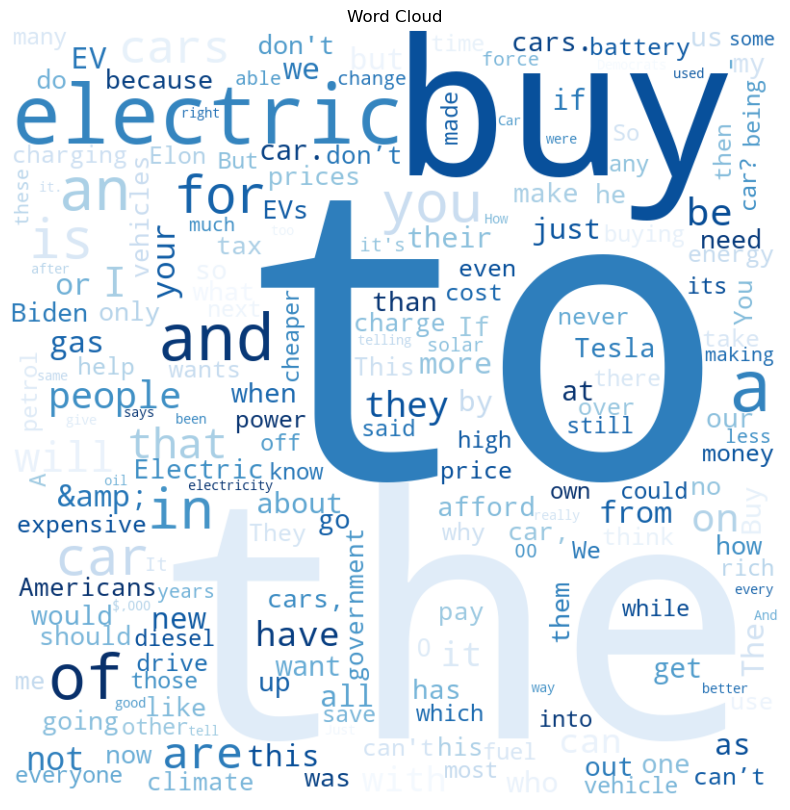

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

words_f = Counter(single_word_c)
# create a word cloud from the frequency of each word
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues').generate_from_frequencies(words_f)
# plot the word cloud
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
ax.set_title('Word Cloud')


plt.show()



### 2.2) Print the 10 most frequent words in all textual content.


In [18]:
com5=[]
from collections import Counter
words_f = Counter(single_word_c)
for w, f  in words_f.most_common(10):
    print(f"{w}: {f}")
    com5+=[(w,f)]

to: 7450
the: 5289
buy: 5159
electric: 4687
a: 3552
and: 2798
of: 2607
an: 2395
in: 2094
you: 2075


### 2.3) Print the count of unique words in the text.


In [19]:
unique_w = []
non_repeat_w = []
for w in single_word_c:
    if w not in unique_w:
        unique_w.append(w)
    else:
        if w in non_repeat_w:
            non_repeat_w.remove(w)
        else:
            non_repeat_w.append(w)

count = len(non_repeat_w)
print("number of  non repeat words  :", count)

number of  non repeat words  : 5661


### 2.4) remove all typos with the correct word.


In [20]:
for w in misspelled_words:
    if w in single_word_c:
        single_word_c.remove(w)

print(single_word_c)


['analysis', 'of', 'the', 'heat', 'pump', 'is', 'a', 'perfect', 'example', 'of', 'this', 'is', 'all', 'the', 'electricity', 'going', 'to', 'come', 'from', 'just', 'to', 'power', 'the', 'heat', 'but', 'also', 'the', 'electric', 'cars', 'we', 'are', 'going', 'to', 'be', 'forced', 'to', 'use', 'the', 'RM0+', 'budget', 'for', 'MRT,', 'and', 'buy', 'of', 'electric', 'buses', 'to', 'cover', 'in', 'certain', 'fuel', 'subsidy', 'for', 'cars', 'priced', 'more', 'than', 'RM00k,', 'and', 'subsidy', 'for', 'cars', 'priced', '&gt;RM00k.', 'build', 'rockets', 'to', 'send', 'humans', 'to', 'manufacture', 'beautiful', 'electric', 'cars', 'on', 'drill', 'tunnels', 'under', 'cities', 'to', 'reduce', 'merge', 'human', 'brain', 'with', 'and', 'what', 'buy', 'and', 'on', '@GrandCanyon', 'was', 'a', 'even', 'though', 'this', 'was', 'a', 'if', 'everyone', 'is', 'forced', 'to', 'buy', 'electric', 'you', 'will', 'literally', 'have', 'millions', 'of', 'cars', 'always', 'needing', 'to', 'be', 'all', 'the', 'will

### 2.5) Convert all words to small letters.


In [21]:
lower_single_word=[]
for i in single_word_c:
    lower_single_word.append(i.lower())
lower_single_word

['analysis',
 'of',
 'the',
 'heat',
 'pump',
 'is',
 'a',
 'perfect',
 'example',
 'of',
 'this',
 'is',
 'all',
 'the',
 'electricity',
 'going',
 'to',
 'come',
 'from',
 'just',
 'to',
 'power',
 'the',
 'heat',
 'but',
 'also',
 'the',
 'electric',
 'cars',
 'we',
 'are',
 'going',
 'to',
 'be',
 'forced',
 'to',
 'use',
 'the',
 'rm0+',
 'budget',
 'for',
 'mrt,',
 'and',
 'buy',
 'of',
 'electric',
 'buses',
 'to',
 'cover',
 'in',
 'certain',
 'fuel',
 'subsidy',
 'for',
 'cars',
 'priced',
 'more',
 'than',
 'rm00k,',
 'and',
 'subsidy',
 'for',
 'cars',
 'priced',
 '&gt;rm00k.',
 'build',
 'rockets',
 'to',
 'send',
 'humans',
 'to',
 'manufacture',
 'beautiful',
 'electric',
 'cars',
 'on',
 'drill',
 'tunnels',
 'under',
 'cities',
 'to',
 'reduce',
 'merge',
 'human',
 'brain',
 'with',
 'and',
 'what',
 'buy',
 'and',
 'on',
 '@grandcanyon',
 'was',
 'a',
 'even',
 'though',
 'this',
 'was',
 'a',
 'if',
 'everyone',
 'is',
 'forced',
 'to',
 'buy',
 'electric',
 'you',
 

### 2.6) Apply a lemmatization technique.


In [22]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /Users/admin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer = WordNetLemmatizer()


# Lemmatize each word in the list and remove any additions to the word
lemmatized_words = []
for word, pos in pos_tag(lower_single_word):
    if pos.startswith('V'):  # verb
        pos = 'v'
    else:
        pos = 'n'

    lemma = lemmatizer.lemmatize(word, pos=pos)

    if lemma != word:
        if word.endswith('ing') and lemma.endswith('e'):
            lemma = lemma[:-1]
        elif word.endswith('ly') and lemma.endswith('e'):
            lemma = lemma[:-1]
        elif word.endswith('ed') and lemma.endswith('e'):
            lemma = lemma[:-1]
        elif word.endswith('ed') and lemma.endswith('y'):
            lemma = lemma[:-1] + 'i'
        elif word.endswith('s') and lemma.endswith('e'):
            lemma = lemma[:-1]
    lemmatized_words.append(lemma)

lemmatized_words



[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/admin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


['analysis',
 'of',
 'the',
 'heat',
 'pump',
 'b',
 'a',
 'perfect',
 'example',
 'of',
 'this',
 'b',
 'all',
 'the',
 'electricity',
 'go',
 'to',
 'come',
 'from',
 'just',
 'to',
 'power',
 'the',
 'heat',
 'but',
 'also',
 'the',
 'electric',
 'car',
 'we',
 'be',
 'go',
 'to',
 'be',
 'forc',
 'to',
 'use',
 'the',
 'rm0+',
 'budget',
 'for',
 'mrt,',
 'and',
 'buy',
 'of',
 'electric',
 'bus',
 'to',
 'cover',
 'in',
 'certain',
 'fuel',
 'subsidy',
 'for',
 'car',
 'pric',
 'more',
 'than',
 'rm00k,',
 'and',
 'subsidy',
 'for',
 'car',
 'pric',
 '&gt;rm00k.',
 'build',
 'rocket',
 'to',
 'send',
 'human',
 'to',
 'manufacture',
 'beautiful',
 'electric',
 'car',
 'on',
 'drill',
 'tunnel',
 'under',
 'city',
 'to',
 'reduce',
 'merge',
 'human',
 'brain',
 'with',
 'and',
 'what',
 'buy',
 'and',
 'on',
 '@grandcanyon',
 'b',
 'a',
 'even',
 'though',
 'this',
 'b',
 'a',
 'if',
 'everyone',
 'b',
 'forc',
 'to',
 'buy',
 'electric',
 'you',
 'will',
 'literally',
 'have',
 '

### 2.7) Print the count of unique words in the text.


In [24]:
unique_w = []
non_repeat_w = []
for w in lemmatized_words:
    if w not in unique_w:
        unique_w.append(w)
    else:
        if w in non_repeat_w:
            non_repeat_w.remove(w)
        else:
            non_repeat_w.append(w)

count = len(non_repeat_w)
print("number of  non repeat words  :", count)


number of  non repeat words  : 1893
